# Hybrid Particle Swarm Optimization with Local Search

In [ ]:
!pip install pyswarms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 KB 5.8 MB/s eta 0:00:00


## Imports

In [44]:
import numpy as np
import pyswarms as ps
import matplotlib.pyplot as plt
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface
from pyswarms.utils.search import RandomSearch
from pyswarms.utils.functions import single_obj as fx
from sklearn import datasets

## Dataset

In [ ]:
X, y = datasets.make_blobs(
      n_samples=150, n_features=4, centers=3, cluster_std=1.75, random_state=141
)

In [ ]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


### Plotting the dataset

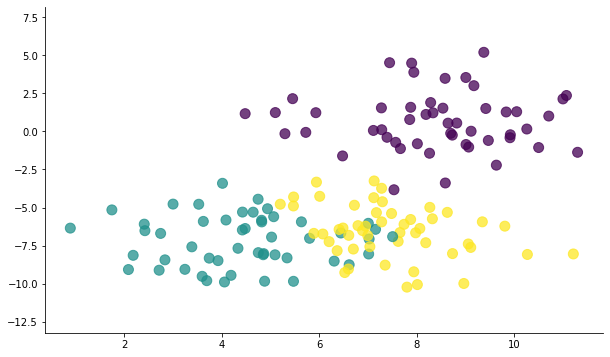

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))

plt.set_cmap('viridis')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, alpha=0.75)

x0_1 = np.amin(X[:, 0])
x0_2 = np.amax(X[:, 0])

x1_min = np.amin(X[:, 1])
x1_max = np.amax(X[:, 1])
ax.set_ylim([x1_min - 3, x1_max + 3])

for spine in ['top','right']:
    ax.spines[spine].set_visible(False)

plt.show()

In [ ]:
n_inputs = 4
n_hidden = 20
n_classes = 3

num_samples = 150

## Neural Network

In [ ]:
def logits_function(p):
    """ Calculate roll-back the weights and biases

    Inputs
    ------
    p: np.ndarray
        The dimensions should include an unrolled version of the
        weights and biases.

    Returns
    -------
    numpy.ndarray of logits for layer 2

    """
    # Roll-back the weights and biases
    W1 = p[0:80].reshape((n_inputs,n_hidden))
    b1 = p[80:100].reshape((n_hidden,))
    W2 = p[100:160].reshape((n_hidden,n_classes))
    b2 = p[160:163].reshape((n_classes,))

    # Perform forward propagation
    z1 = X.dot(W1) + b1  # Pre-activation in Layer 1
    a1 = np.tanh(z1)     # Activation in Layer 1
    logits = a1.dot(W2) + b2 # Pre-activation in Layer 2
    return logits          # Logits for Layer 2

In [ ]:
# Forward propagation
def forward_prop(params):
    """Forward propagation as objective function

    This computes for the forward propagation of the neural network, as
    well as the loss.

    Inputs
    ------
    params: np.ndarray
        The dimensions should include an unrolled version of the
        weights and biases.

    Returns
    -------
    float
        The computed negative log-likelihood loss given the parameters
    """

    logits = logits_function(params)

    # Compute for the softmax of the logits
    exp_scores = np.exp(logits)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # Compute for the negative log likelihood

    corect_logprobs = -np.log(probs[range(num_samples), y])
    loss = np.sum(corect_logprobs) / num_samples

    return loss

## Objective Function

In [ ]:
def f(x):
    """Higher-level method to do forward_prop in the
    whole swarm.

    Inputs
    ------
    x: numpy.ndarray of shape (n_particles, dimensions)
        The swarm that will perform the search

    Returns
    -------
    numpy.ndarray of shape (n_particles, )
        The computed loss for each particle
    """
    n_particles = x.shape[0]
    j = [forward_prop(x[i]) for i in range(n_particles)]
    return np.array(j)

## Training

In [ ]:
# Initialize swarm
options = {
    'c1': 0.5, 
    'c2': 0.3, 
    'w':0.9
}

# Call instance of PSO
dimensions = (n_inputs * n_hidden) + (n_hidden * n_classes) + n_hidden + n_classes
optimizer = ps.single.GlobalBestPSO(n_particles=100, dimensions=dimensions, options=options)

# Perform optimization
cost, pos = optimizer.optimize(f, iters=1000)

2023-01-11 22:50:03,378 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.06
2023-01-11 22:50:26,921 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.06004636982288839, best pos: [ 0.44893472  0.67979635 -0.94540906  0.52378596 -0.95014926 -0.08127994
  0.50511975  0.01677122  0.41191715 -0.88725439  0.63434362  1.08506552
 -0.40637894 -0.92425634  0.88788311 -2.56241435  0.6339151  -0.72333528
  0.09873746  0.8148478   0.25054987  1.24780429 -0.51703136  0.05067685
 -0.9172271   0.84681591  0.58374923 -1.02911933 -0.11952681 -1.2493821
 -0.28109515 -0.29517171  0.16676151  0.84978283  0.34985975  0.62364751
  0.9157749  -0.65279743  0.33713899  0.70413747 -0.4420809  -2.16472135
 -0.18234733  0.12921844  0.36353214 -1.63705896 -1.10492389  0.6544276
 -0.78197432 -0.23938428 -1.5722284   1.05995372  1.30905757  0.54057903
  0.17519242  0.1509

In [ ]:
# Obtain the cost history
optimizer.cost_history
# Obtain the position history
optimizer.pos_history
# Obtain the velocity history
optimizer.velocity_history

[array([[0.45733414, 0.38287857, 0.15685812, ..., 0.39683084, 0.73488687,
         0.28655446],
        [0.74613407, 0.5565925 , 0.89506312, ..., 0.87909616, 0.6936221 ,
         0.36421011],
        [0.98301998, 0.12027135, 0.5768668 , ..., 0.66555947, 0.95270732,
         0.2310661 ],
        ...,
        [0.58244905, 0.17439676, 0.75621973, ..., 0.6000393 , 0.52532432,
         0.27620201],
        [0.92058819, 0.8059616 , 0.78118218, ..., 0.18725892, 0.29312843,
         0.80826756],
        [0.32579937, 0.13276922, 0.69933139, ..., 0.00573868, 0.43549413,
         0.52934794]]),
 array([[0.41502061, 0.34466342, 0.11466212, ..., 0.42323333, 0.86187843,
         0.14170057],
        [0.67650742, 0.56883517, 0.78690801, ..., 0.8070713 , 0.69686858,
         0.33637595],
        [1.0030097 , 0.13436077, 0.43389743, ..., 0.60621786, 0.86496915,
         0.2192581 ],
        ...,
        [0.50154644, 0.20917123, 0.65076641, ..., 0.50593255, 0.56802409,
         0.24875032],
        [0.8

In [ ]:
def predict(pos):
    """
    Use the trained weights to perform class predictions.

    Inputs
    ------
    pos: numpy.ndarray
        Position matrix found by the swarm. Will be rolled
        into weights and biases.
    """
    logits = logits_function(pos)
    y_pred = np.argmax(logits, axis=1)
    return y_pred

In [ ]:
(predict(pos) == y).mean()

0.98

## Grid Search

In [54]:
# Set-up choices for the parameters
options = {
    'c1': (1,10),
    'c2': (1,10),
    'w': (1,10),
    'k': (1, 15),
    'p': 1
}

dimensions = (n_inputs * n_hidden) + (n_hidden * n_classes) + n_hidden + n_classes
g = RandomSearch(ps.single.GlobalBestPSO, n_particles=100,
            dimensions=dimensions, options=options, objective_func=f,
            iters=10, n_selection_iters=100)

best_score, best_options = g.search()

2023-01-11 23:25:44,791 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 7.9667524922577195, 'c2': 1.3261576884057904, 'w': 5.731753192854952, 'k': 8, 'p': 1}
pyswarms.single.global_best: 100%|██████████|10/10, best_cost=0.786
2023-01-11 23:25:45,025 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.7863371504459207, best pos: [4.51209078 1.86077732 1.03139005 1.24124496 1.4084556  1.56215758
 1.24381463 1.39888801 4.32627093 5.27661083 0.79748853 4.0305647
 4.07572713 1.8422914  5.97405311 1.54775434 4.15197446 1.07616938
 1.76125996 5.2930652  5.61876612 1.48287283 5.10176225 4.47392947
 3.72710532 1.44674276 1.0939175  5.2364088  1.15565666 5.80222796
 5.39038427 1.83281234 1.08658026 5.52524924 1.53749224 1.28164436
 1.58669277 1.88934681 1.05129652 4.67168997 5.37521551 1.89540364
 0.47163029 4.42845072 5.80751166 5.0196627  0.90024159 5.44225829
 4.37426538 3.67462345 1.87042675 5.82258693 1.22879718 5.63237803
 3.27223502 1.30866